## Assignment 4 Data Analysis and Visualization

<div class="alert alert-success">There are 6 problems worth 5 points each in this assignment. You are expected to complete and submit your work on time.
<br>
<ul>
<li>To submit your work, click on the <samp><b>Submit</b></samp> button on the top right navigation pane. Confirm that you want to submit by clicking <samp><b>Yes</b></samp> on the pop-up. </li>
<br>
<li>You can verify the status of the submission by clicking the <samp><b>Details</b></samp> button on the top right navigation pane.</li>
<br>
<li>You can also see grade details by clicking on the <samp><b>Grades</b></samp> button once the grade is released.</li>
</ul>
</div>

## Problem 1

You have been tasked with analyzing stock market data. Write a Python program to complete the following tasks:
+ Create a DataFrame by loading the data from a CSV file located at http://www3.nd.edu/~xduan/data-sets/f4_close_price.csv. Convert the **Date** column to the datetime type and set it as the row index of the DataFrame.
+ Display 10 randomly selected rows from the DataFrame.
+ Output a statistical summary for all columns in the DataFrame.
+ Create a new DataFrame that shows the minimum and maximum closing price for each stok and display your result.

In [1]:
###
### YOUR CODE HERE
###
import pandas as pd 
close_price=pd.read_csv("http://www3.nd.edu/~xduan/data-sets/f4_close_price.csv")
close_price["Date"]=pd.to_datetime(close_price["Date"])
close_price=close_price.set_index("Date")
display(close_price.sample(10))

,Stock,Close
Date,,
2023-01-04,AMZN,85.14
2023-02-16,GOOG,95.78
2022-05-16,MSFT,261.50
2022-09-13,GOOG,105.31
2022-10-12,GOOG,98.30
2023-07-28,AAPL,195.83
2023-12-13,MSFT,374.37
2022-06-30,AAPL,136.72
2022-02-11,GOOG,134.13


In [2]:
display(close_price.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2004 entries, 2022-01-03 to 2023-12-29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Stock   2004 non-null   object 
 1   Close   2004 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.0+ KB


None

In [3]:
close_price_min_max=close_price.groupby("Stock")["Close"].agg(["min","max"])
display(close_price_min_max)

,min,max
Stock,,
AAPL,125.02,198.110
AMZN,81.82,170.404
GOOG,83.49,148.036
MSFT,214.25,382.700


## Problem 2
Expand the analysis you've done in the previous problem by completing the following tasks:
+ Enhance the DataFrame by adding a new column named **Year** that contains the year part of the Date.
+ Create a new DataFrame that the shows the average closing price of each stock in each year and visualize your result in a grouped bar chart. Make the chart 8 inches wide by 6 inches high. Properly label the y-axis and title of the plot.

**Note**: Your plot should look similar to this:
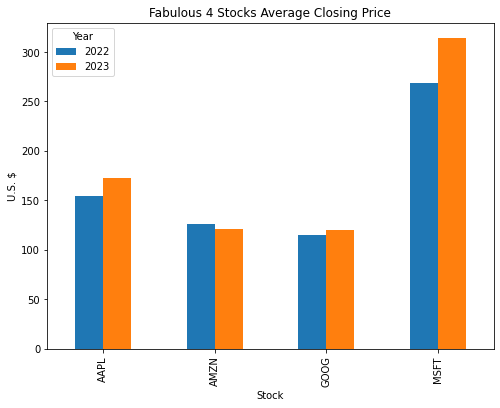

In [4]:
###
### YOUR CODE HERE
###
close_price["Year"]=pd.DatetimeIndex(close_price.index).year
display(close_price)

,Stock,Close,Year
Date,,,
2022-01-03,AAPL,182.01,2022
2022-01-04,AAPL,179.70,2022
2022-01-05,AAPL,174.92,2022
2022-01-06,AAPL,172.00,2022
2022-01-07,AAPL,172.17,2022
...,...,...,...
2023-12-22,MSFT,374.58,2023
2023-12-26,MSFT,374.66,2023
2023-12-27,MSFT,374.07,2023


In [5]:
close_price_avg_year=close_price.groupby(["Stock","Year"])["Close"].mean().unstack()
display(close_price_avg_year)

Year,2022,2023
Stock,,
AAPL,154.835060,172.54896
AMZN,126.098797,121.37278
GOOG,115.193721,119.61186
MSFT,268.917092,313.95098


<Figure size 576x432 with 0 Axes>

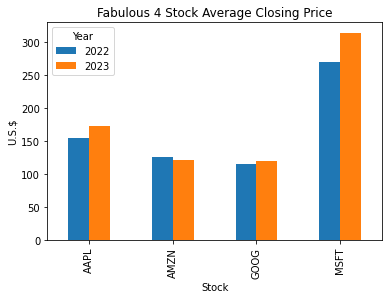

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
close_price_avg_year.plot(kind="bar")
plt.title('Fabulous 4 Stock Average Closing Price') 
plt.ylabel("U.S.$")
plt.show()

## Problem 3

You have been tasked with analyzing the historical average ridership data collected by the Massachusetts Bay Transportation Authority (MBTA). Write a Python program to complete the following tasks:


+ Create a DataFrame by loadng the MBTA ridership data from the csv file located at http://www3.nd.edu/~xduan/data-sets/mbta.csv. Display the entire DataFrame.
+ Change the format of the DataFrame from wide to long so all the months are in one column named **month** and the rideship are in another column named **ridership**. Display your result.
+ Split the **month** column into two separate columns: one for the month and the other for the year. Display your result.
+ Create a line plot showing the ridership trend for each transportation mode over 12 months, with shaded areas around each line to represent the 90% confidence interval. Make the plot 10 inches wide by 12 inches high. Properly label the x-axis, y-axis, and title of the plot. Display the legend in 4 columns on the upper left corner.

**Note**: Your plot should look similar to this:
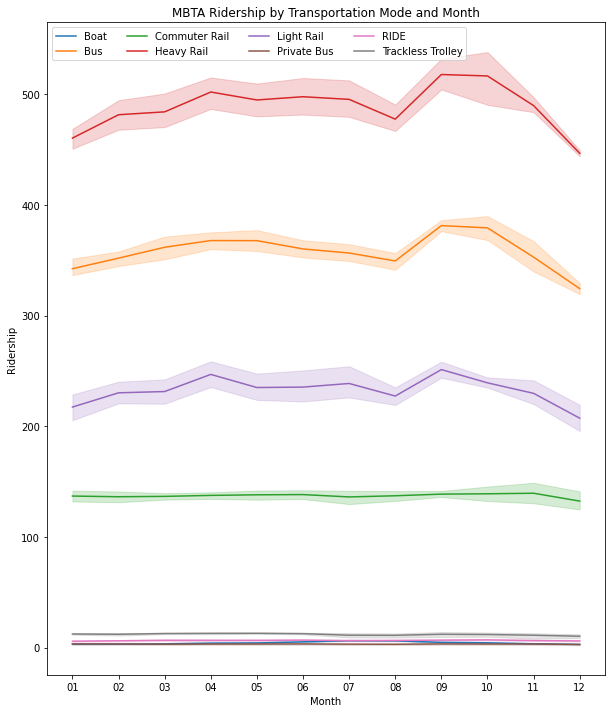

In [7]:
###
### YOUR CODE HERE
###
mbta=pd.read_csv("http://www3.nd.edu/~xduan/data-sets/mbta.csv")
display(mbta)

,mode,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,...,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10
0,Boat,4.000,3.600,4.000,4.300,4.900,5.800,6.521,6.572,5.469,...,3.140,3.284,3.674,4.251,4.431,5.474,6.581,6.733,5.003,4.484
1,Bus,335.819,338.675,339.867,352.162,354.367,350.543,357.519,355.479,372.598,...,334.958,346.234,380.399,380.446,385.289,376.317,361.585,353.793,388.271,398.456
2,Commuter Rail,142.200,138.500,137.700,139.500,139.000,143.000,142.391,142.364,143.051,...,128.396,125.463,134.374,134.169,136.140,135.581,132.410,130.616,136.901,128.720
3,Heavy Rail,435.294,448.271,458.583,472.201,474.579,477.032,471.735,461.605,499.566,...,468.418,504.068,516.730,528.631,528.122,529.528,532.888,508.145,550.137,554.932
4,Light Rail,227.231,240.262,241.444,255.557,248.262,246.108,243.286,234.907,265.748,...,198.450,219.886,227.935,242.280,225.776,221.865,231.010,220.164,244.949,237.768
5,Private Bus,4.772,4.417,4.574,4.542,4.768,4.722,3.936,3.946,4.329,...,2.213,2.570,2.559,2.762,2.776,2.815,2.671,2.655,2.843,2.967
6,RIDE,4.900,5.000,5.500,5.400,5.400,5.600,5.253,5.308,5.609,...,6.735,7.463,8.387,8.145,8.059,8.377,7.902,8.071,8.318,8.598
7,Trackless Trolley,12.757,12.913,13.057,13.444,13.479,13.323,13.311,13.142,14.393,...,11.104,11.695,12.601,12.599,12.291,12.128,11.060,11.091,12.332,12.297


In [8]:
mbta_long=mbta.melt(id_vars="mode",
                   var_name="month",
                   value_name="ridership")
display(mbta_long)

,mode,month,ridership
0,Boat,2007-01,4.000
1,Bus,2007-01,335.819
2,Commuter Rail,2007-01,142.200
3,Heavy Rail,2007-01,435.294
4,Light Rail,2007-01,227.231
...,...,...,...
459,Heavy Rail,2011-10,554.932
460,Light Rail,2011-10,237.768
461,Private Bus,2011-10,2.967
462,RIDE,2011-10,8.598


In [9]:
mbta_long[["year","month"]]=mbta_long["month"].str.split("-", expand=True)
display(mbta_long)

,mode,month,ridership,year
0,Boat,01,4.000,2007
1,Bus,01,335.819,2007
2,Commuter Rail,01,142.200,2007
3,Heavy Rail,01,435.294,2007
4,Light Rail,01,227.231,2007
...,...,...,...,...
459,Heavy Rail,10,554.932,2011
460,Light Rail,10,237.768,2011
461,Private Bus,10,2.967,2011
462,RIDE,10,8.598,2011


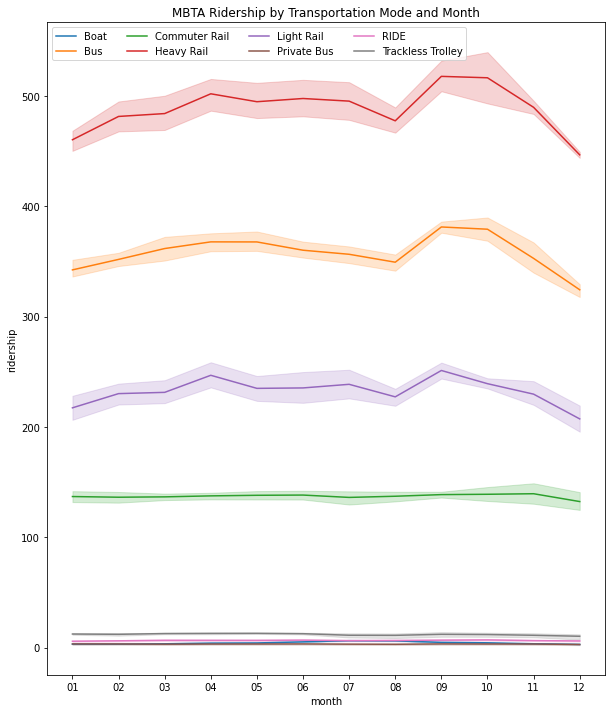

In [10]:
plt.figure(figsize = (10, 12)) 
sns.lineplot(data=mbta_long, 
             x="month", 
             y="ridership",
             estimator="mean", 
             errorbar=("ci",90) , 
             hue="mode")
plt.title("MBTA Ridership by Transportation Mode and Month") 
plt.legend(ncol=4, loc="upper left") 
plt.show()

## Problem 4
Expand the analysis you've done in the previous problem by completing the following tasks:
+ Create a new DataFrame that contains only the ridership for the transportation mode including **Commuter Rail**, **Heavy Rail**, and **Light Rail**. Display the last 4 rows of your result.
+ Create a grouped bar chart to compare the average ridership of those rail transportation modes across the years. Each bar should include a black vertical line representing the standard deviation from the average ridership.  Make the plot 8 inches wide by 6 inches high. Properly label the x-axis, y-axis, and title of the plot.

**Note**: Your plot should look similar to this: 
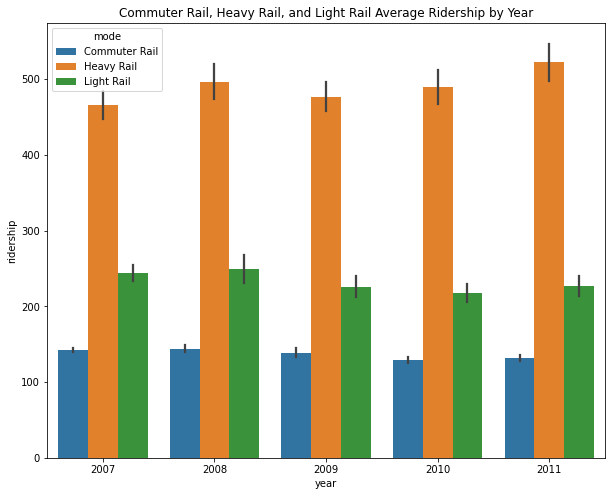

In [11]:
###
### YOUR CODE HERE
###
rail_mask=mbta_long["mode"].isin(["Commuter Rail","Heavy Rail","Light Rail"])
mbta_rail=mbta_long[rail_mask]
display(mbta_rail.tail(4))

,mode,month,ridership,year
452,Light Rail,09,244.949,2011
458,Commuter Rail,10,128.720,2011
459,Heavy Rail,10,554.932,2011
460,Light Rail,10,237.768,2011


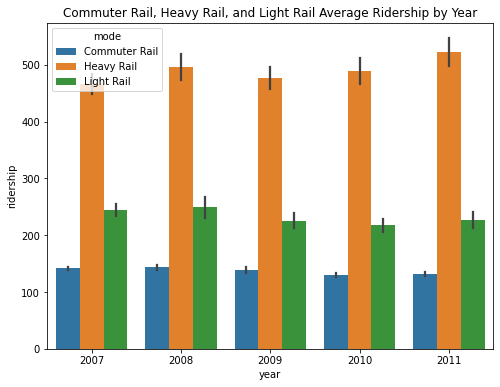

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(data=mbta_rail, 
            x="year", 
            y="ridership", 
            estimator="mean", 
            errorbar="sd",
            hue="mode" )
plt.title("Commuter Rail, Heavy Rail, and Light Rail Average Ridership by Year") 
plt.show()

## Problem 5
Expand the analysis you have done in the previous problem by completing the following tasks:

+ Create a new DataFrame that contains only the ridership for the **Bus** and **Heavy Rail** transportation mode.
+ Create a violin plot that compares the ridership distribution of the **Bus** and **Heavy Rail** mode across the years. Make the plot 9 inches wide by 6 inches high. Properly label the x-axis, y-axis, and title of the plot.
+ Add a Markdown cell below your plot to share a few of observations.

**Note**: Your plot should look similar to this:
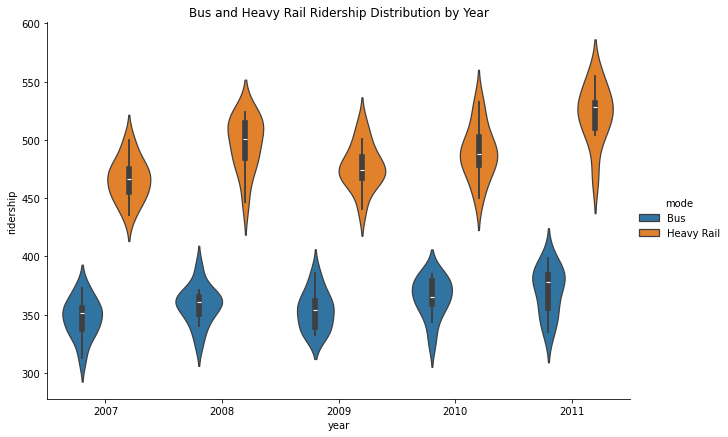

In [13]:
###
### YOUR CODE HERE
###
rail_bus_mask=mbta_long["mode"].isin(["Bus","Heavy Rail"])
mbta_bus_rail=mbta_long[rail_bus_mask]
display(mbta_bus_rail.head())

,mode,month,ridership,year
1,Bus,01,335.819,2007
3,Heavy Rail,01,435.294,2007
9,Bus,02,338.675,2007
11,Heavy Rail,02,448.271,2007
17,Bus,03,339.867,2007


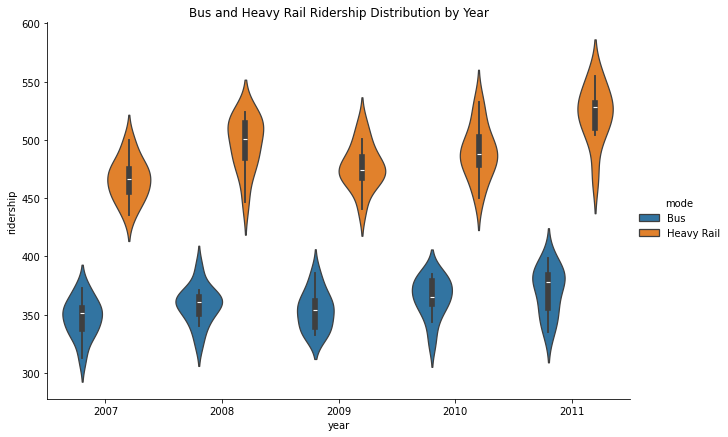

In [18]:
sns.catplot(data=mbta_bus_rail, 
            x="year",
            y="ridership", 
            hue="mode", 
            kind="violin",
            height=6, 
            aspect=1.5 )
plt.title("Bus and Heavy Rail Ridership Distribution by Year") 
plt.show()

The heavy rail is consistently recieving more ridership than the bus. There is also more distribution on the heavy rail compared to the bus.

## Problem 6
Expand the analysis you have done in the previous problem by completing the following tasks:
+ Transform the long-format MBTA DataFrame you created in Problem 3 to a wide format so the **year** and **month** become the row indices and each unique transportation mode becomes a column with its corresponding ridership values.
+ Create a new DataFrame that contains only the ridershare for the **Heavil Rail** and **Light Rail** transportation mode in **2010**.
+ Create a heatmap chart that visualizes the ridershare trend of **Heavil Rail** and **Light Rail** across the months in **2010**.
+ Add a Markdown cell below your plot to share a few observations.

**Note**: Feel free to use your favorite color palette. Your plot should look similiar to this:
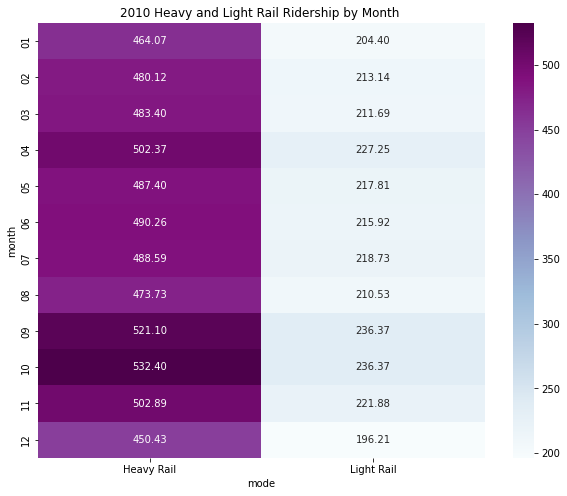

In [15]:
###
### YOUR CODE HERE
###
mbta_wide=mbta_long.pivot(index=["year","month"],
                          columns="mode", 
                          values="ridership")
display(mbta_wide)

mode         Boat      Bus  Commuter Rail  Heavy Rail  Light Rail  \
year month                                                          
2007 01     4.000  335.819        142.200     435.294     227.231   
     02     3.600  338.675        138.500     448.271     240.262   
     03     4.000  339.867        137.700     458.583     241.444   
     04     4.300  352.162        139.500     472.201     255.557   
     05     4.900  354.367        139.000     474.579     248.262   
     06     5.800  350.543        143.000     477.032     246.108   
     07     6.521  357.519        142.391     471.735     243.286   
     08     6.572  355.479        142.364     461.605     234.907   
     09     5.469  372.598        143.051     499.566     265.748   
     10     5.145  368.847        146.542     457.741     241.434   
     11     3.763  330.826        145.089     488.348     250.497   
     12     2.985  312.920        141.585     448.268     233.379   
2008 01     3.175  340.324        142.145     472.624     241.223   
     02     3.111  352.905        142.607     492.100     249.306   
     03     3.512  361.155        137.453     494.046     253.132   
     04     4.164  368.189        140.389     513.204     271.070   
     05     4.015  363.903        142.585     507.952     258.351   
     06     5.189  362.962        142.057     518.349     266.961   
     07     6.016  370.921        145.731     512.309     270.158   
     08     5.800  361.057        144.565     476.990     239.344   
     09     4.587  389.537        141.907     517.324     258.171   
     10     4.285  357.974        151.957     523.644     250.063   
     11     3.488  345.423        152.952     487.115     232.068   
     12     3.007  325.767        140.810     446.743     205.420   
2009 01     3.014  338.532        141.448     461.004     215.660   
     02     3.196  360.412        143.529     482.407     228.737   
     03     3.330  353.686        142.893     467.224     222.844   
     04     4.049  359.380        142.340     493.152     238.232   
     05     4.119  354.750        144.225     475.634     224.962   
     06     4.900  347.865        142.006     473.099     226.259   
     07     6.444  339.477        137.691     470.828     230.308   
     08     5.903  332.661        139.158     466.676     231.783   
     09     4.696  374.260        139.087     500.403     250.922   
     10     4.212  385.868        137.104     513.406     230.739   
     11     3.576  366.980        129.343     480.278     214.711   
     12     3.113  332.394        126.066     440.925     194.446   
2010 01     3.207  362.226        130.910     464.069     204.396   
     02     3.195  361.138        131.918     480.121     213.136   
     03     3.481  373.443        131.252     483.397     211.693   
     04     4.452  378.611        131.722     502.374     227.246   
     05     4.415  380.171        128.800     487.400     217.805   
     06     5.411  363.275        129.144     490.263     215.922   
     07     6.513  353.040        122.935     488.587     218.729   
     08     6.269  343.688        129.732     473.731     210.530   
     09     4.699  381.622        132.892     521.099     236.368   
     10     4.402  384.987        131.033     532.403     236.366   
     11     3.731  367.955        130.889     502.887     221.881   
     12     3.156  326.338        121.422     450.433     196.211   
2011 01     3.140  334.958        128.396     468.418     198.450   
     02     3.284  346.234        125.463     504.068     219.886   
     03     3.674  380.399        134.374     516.730     227.935   
     04     4.251  380.446        134.169     528.631     242.280   
     05     4.431  385.289        136.140     528.122     225.776   
     06     5.474  376.317        135.581     529.528     221.865   
     07     6.581  361.585        132.410     532.888     231.010   
     08     6.733  353.793        130.616     508.145     220.164  

In [16]:
rail_2010=mbta_wide.loc["2010",("Heavy Rail","Light Rail")]
display(rail_2010)

mode,Heavy Rail,Light Rail
month,,
01,464.069,204.396
02,480.121,213.136
03,483.397,211.693
04,502.374,227.246
05,487.400,217.805
06,490.263,215.922
07,488.587,218.729
08,473.731,210.530
09,521.099,236.368


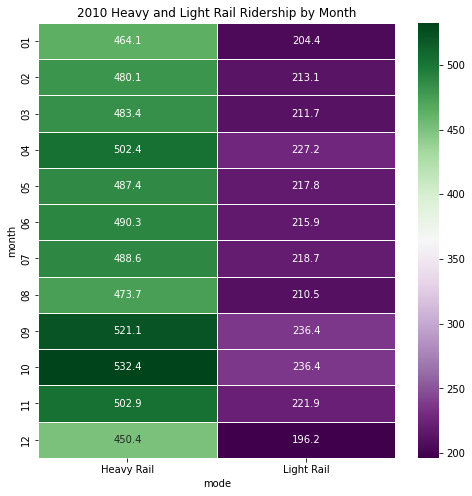

In [17]:
plt.figure(figsize=(8, 8))
sns.heatmap(data=rail_2010, 
      cmap="PRGn", 
      annot=True, 
     fmt = ".1f", 
      linewidths=.5)
plt.title("2010 Heavy and Light Rail Ridership by Month")
plt.show()

The heavy rail is consistently higher in ridership than the light rail. There is also some clear seasonality as both the heavy and light rail see a decrease in ridership in december. 